In [1]:
import sys
sys.path.insert(1, r'D:\COLD\sebm_paper\frontiers_submission\04_UAV_SEBM')

import os
import numpy as np
import rioxarray
import xarray as xr
import pandas as pd
from datetime import datetime, timezone, timedelta
from matplotlib import pyplot as plt
from sinosoidal_regression import sinusoidal_regression

In [2]:
LST_folder = os.path.join(os.getcwd(), 'data',  'LandSurfaceTemperature')
LST_paths = [os.path.join(LST_folder, i) for i in os.listdir(LST_folder)]

In [3]:
flight_times = [9, 11, 13, 15, 17, 19, 21, 22] # local time of UAV flights
tmz=2 # conversion to utc
   
dtobj_list=pd.Series(
    [datetime(2019, 8, 30, 8, 45, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 10, 40, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 12, 50, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 14, 40, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 16, 40, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 18, 30, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 20, 30, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz),
    datetime(2019, 8, 30, 21, 30, 0).replace(tzinfo=timezone.utc) - timedelta(hours = tmz)])

In [4]:
time_var = xr.Variable('time', dtobj_list)
dataset = xr.concat([xr.open_rasterio(i) for i in LST_paths], dim=time_var).to_dataset('band').rename({1: 'LST'})

In [5]:
wr_path = os.path.join(os.getcwd(), 'data', 'warmingrate')

if not os.path.exists(wr_path):              
    os.makedirs(wr_path)
    print('dir created, sinusoidal_regression started')
    warmingrate = sinusoidal_regression(dataset.LST.data, output = None)  
    dataset['WR'] = (['time', 'y', 'x'], warmingrate)
    for n, i in enumerate(dataset.WR.data):
        filename = 'warmingrate'+ '_' +dtobj_list[n].strftime("%Y%m%d_%H%M%S")+'.tif'
        dataset.WR.isel(time=n).rio.to_raster(os.path.join(wr_path, filename))

dir created, sinusoidal_regression started


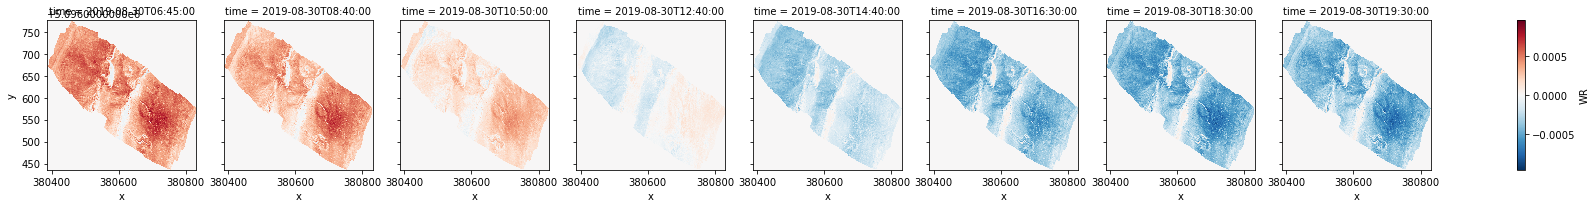

In [6]:
dataset.WR.plot(col='time')

In [8]:
dataset

<xarray.Dataset>
Dimensions:  (time: 8, y: 2127, x: 2776)
Coordinates:
  * y        (y) float64 5.097e+06 5.097e+06 5.097e+06 ... 5.096e+06 5.096e+06
  * x        (x) float64 3.804e+05 3.804e+05 3.804e+05 ... 3.808e+05 3.808e+05
  * time     (time) datetime64[ns] 2019-08-30T06:45:00 ... 2019-08-30T19:30:00
Data variables:
    LST      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    WR       (time, y, x) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    transform:      (0.16, 0.0, 380387.1360814194, 0.0, -0.16, 5096776.097651...
    crs:            +init=epsg:32632
    res:            (0.16, 0.16)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area